# Hotel booking demand酒店预订数据分析与分类预测

Github地址：https://github.com/ZZZhaojiajing/dataMining_homework

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
data_origin=pd.read_csv("../datamining_dataset/hotel_bookings.csv")

In [3]:
pd.set_option('display.max_columns', None)#显示所有列

In [4]:
data_origin.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


列名及其含义：

hotel: Resort Hotel / City Hotel

is_canceled:预定是否取消 1是 0否

lead_time：从预订进入日期到到达日期之间经过的天数

arrival_date_year：入住年份

arrival_date_month：入住月份

arrival_date_week_number：入住于当前年份的第几周

arrival_date_day_of_month：入住日（1-31）

stays_in_weekend_nights：周末晚上(周六或周日)客人入住或预订入住酒店的天数

stays_in_week_nights：工作日(周一至周五)客人入住或预订入住酒店的天数

adults：成人数量

children：孩子数量

babies：婴儿数量

meal:订餐类型。Undefined/SC -无餐食包装;BB -床和早餐;HB -半餐(早餐和另一餐，通常是晚餐);FB -全餐(早餐、午餐和晚餐)

country:入住者国籍

market_segment：入住是跟随旅行社/自驾游

distribution_channel：预定销售渠道

is_repeated_guest：预定姓名是否为重复客人 1是 0否

previous_cancellations：客户在当前预订之前取消的先前预订的数量

previous_bookings_not_canceled：客户在当前预订之前未取消的先前预订的数量

reserved_room_type：预留房间类型

assigned_room_type：为预订分配的房间类型编码。有时由于酒店经营原因(如超额预定)或客户要求，所分配的房间类型与预订的房间类型不同。

booking_changes：从预订单输入到登记或取消的那一刻起，对预订所做的更改/修改的次数

deposit_type：客户是否为保证预订而支付订金的指示。

agent：作出预订的旅行社的身份证明

company：作出订租或负责支付订租的公司/实体的身分证明。

days_in_waiting_list：在向客户确认之前，预订在等待列表中的天数

customer_type：客户类型

adr：Average Daily Rate  每日平均住宿费，即所有住宿交易总额除以入住总天数

required_car_parking_spaces：客户要求的停车位数量

total_of_special_requests：顾客提出的特别要求数目(例如:双人床或高层)

reservation_status：预订的最后状态  Canceled--预定取消 Check-Out-客户已入住并退房   No-Show--客人未办理入住手续

reservation_status_date：预订的最后状态日期

In [5]:
#选择有用的列进行后续的数据分析
data=pd.DataFrame(data_origin[['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_day_of_month','meal','previous_bookings_not_canceled','reserved_room_type','customer_type','adr','reservation_status','reservation_status_date']])

In [6]:
data.head(5)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,previous_bookings_not_canceled,reserved_room_type,customer_type,adr,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,1,BB,0,C,Transient,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,2015,July,1,BB,0,C,Transient,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,2015,July,1,BB,0,A,Transient,75.0,Check-Out,2015-07-02
3,Resort Hotel,0,2015,July,1,BB,0,A,Transient,75.0,Check-Out,2015-07-02
4,Resort Hotel,0,2015,July,1,BB,0,A,Transient,98.0,Check-Out,2015-07-03


# 1.基本情况：假日酒店和城市酒店预定需求和入住率比较

预订需求比较

In [7]:
data.replace('Undefined','SC',inplace=True) #将meal一列值为Undefined全部替换为SC
data_rh=data[(data.hotel=='Resort Hotel') ]
data_ch=data[(data.hotel=='City Hotel') ]

Text(0.5,1,'City Hotel')

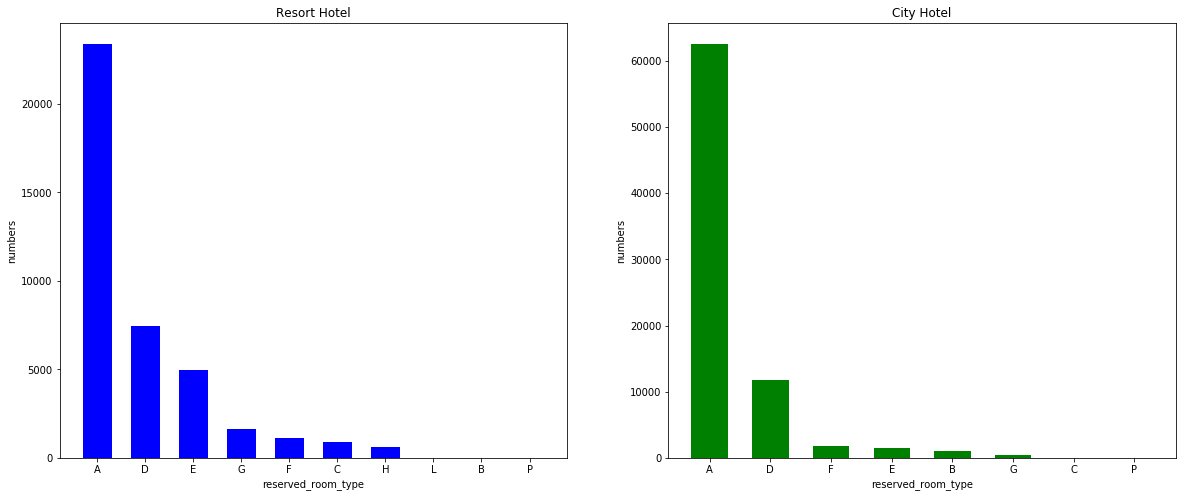

In [8]:
#预订房间类型比较
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.bar(data_rh.reserved_room_type.value_counts().index,data_rh.reserved_room_type.value_counts(),width=0.6,color='b', label='Resort Hotel')
plt.xlabel('reserved_room_type')
plt.ylabel('numbers') 
plt.title('Resort Hotel')  
plt.subplot(1,2,2)
plt.bar(data_ch.reserved_room_type.value_counts().index,data_ch.reserved_room_type.value_counts(),width=0.6,color='g', label='City Hotel')
plt.xlabel('reserved_room_type')
plt.ylabel('numbers') 
plt.title('City Hotel')  

上图说明人们在预订假日酒店或城市酒店时的第一选择都是A类，第二选择都是D类。对于假日酒店的第三选择，更多的人选择E类；而对于城市酒店的第三选择，更多的人选择F类。

入住率比较

In [9]:
#入住率比较   入住率=预定未取消记录数/总记录数
occupancy_rh=data_rh[data_rh.is_canceled==0].is_canceled.count()/data_rh.is_canceled.count()
occupancy_ch=data_ch[data_ch.is_canceled==0].is_canceled.count()/data_ch.is_canceled.count()
print('假日酒店的入住率={:.4}'.format(occupancy_rh))
print('城市酒店的入住率={:.4}'.format(occupancy_ch))

假日酒店的入住率=0.7224
城市酒店的入住率=0.5827


# 2.用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况分析

提前预订时间分析

In [10]:
data_lead=data_origin[['hotel','is_canceled','lead_time'  ]]
data_lead_rh=data_lead[(data_lead.hotel=='Resort Hotel')& data_lead.is_canceled==0]
data_lead_ch=data_lead[(data_lead.hotel=='City Hotel')& data_lead.is_canceled==0]

Text(0,0.5,'counts')

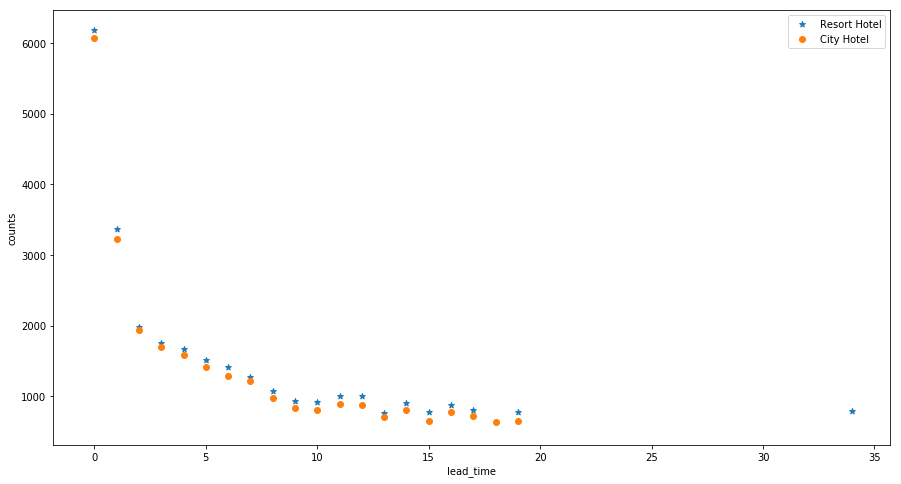

In [11]:
#绘制假日酒店和城市酒店提前预订时间与对应记录条数的散点图
plt.figure(figsize=(15, 8))
plt.scatter(data_lead_rh.lead_time.value_counts()[0:20].index,data_lead_rh.lead_time.value_counts()[0:20],marker='*',label='Resort Hotel')
plt.scatter(data_lead_ch.lead_time.value_counts()[0:20].index,data_lead_ch.lead_time.value_counts()[0:20],marker='o',label='City Hotel')
plt.legend() 
plt.xlabel('lead_time')  
plt.ylabel('counts')  

上图说明绝大部分人会选择提前0-5天预订假日酒店或城市酒店

入住时长分析  入住时长=预订最后状态时间-到达时间

In [12]:
data_bookdate=pd.DataFrame(data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','reservation_status_date']])

In [13]:
data_bookdate.head(5)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-02
3,2015,July,1,2015-07-02
4,2015,July,1,2015-07-03


In [14]:
#将到达月份做字符串到数字的映射
class_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}
data_bookdate.arrival_date_month=data_bookdate.arrival_date_month.map(class_mapping)

In [15]:
data_bookdate['reservation_status_date']=pd.to_datetime(data_bookdate['reservation_status_date'])#转换为日期格式
data_bookdate['reservation_status_date_year']=data_bookdate['reservation_status_date'].dt.year
data_bookdate['reservation_status_date_month']=data_bookdate['reservation_status_date'].dt.month
data_bookdate['reservation_status_date_day']=data_bookdate['reservation_status_date'].dt.day

In [16]:
data_bookdate.drop(columns=['reservation_status_date'],inplace=True)

In [17]:
data_bookdate.head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,2015,7,1,2015,7,1
1,2015,7,1,2015,7,1
2,2015,7,1,2015,7,2
3,2015,7,1,2015,7,2
4,2015,7,1,2015,7,3


In [18]:
import datetime

In [19]:
book_days_list=[]
for i in range(0, len(data_bookdate)):
    a_date=datetime.date(data_bookdate.iloc[i]['arrival_date_year'],data_bookdate.iloc[i]['arrival_date_month'],data_bookdate.iloc[i]['arrival_date_day_of_month'])
    r_date=datetime.date(data_bookdate.iloc[i]['reservation_status_date_year'],data_bookdate.iloc[i]['reservation_status_date_month'],data_bookdate.iloc[i]['reservation_status_date_day'])
    book_days_list.append((r_date-a_date).days) #计算每条记录的入住时长

In [20]:
book_days=pd.Series(book_days_list)

In [21]:
book_days.value_counts()[0:20]

 1     15747
 3     15723
 2     15479
 4     11024
 7      5679
 5      5119
 0      2793
 6      2322
 10      780
 8       719
-3       718
 14      654
-6       636
-1       630
-5       603
-7       599
-11      593
-4       581
-16      531
 9       526
dtype: int64

Text(0,0.5,'counts')

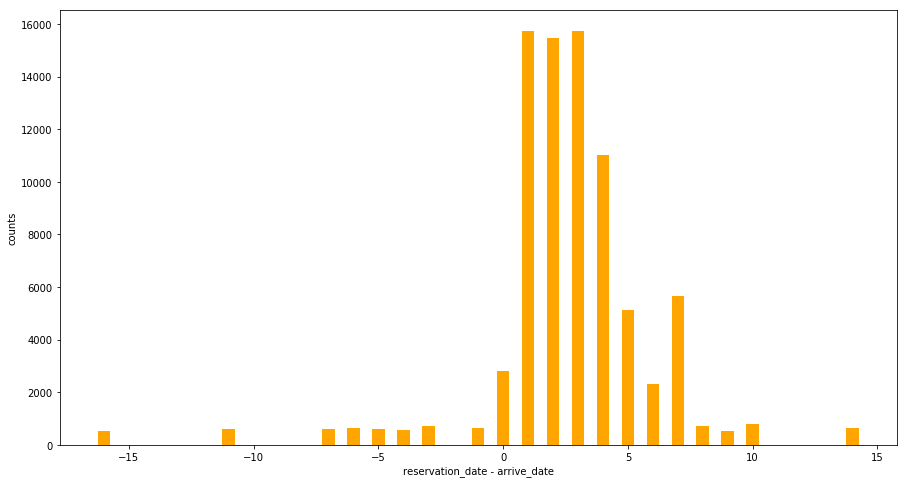

In [22]:
#绘制入住时长与对应记录数量的条形统计图
plt.figure(figsize=(15, 8))
plt.bar(book_days.value_counts()[0:20].index,book_days.value_counts()[0:20],width=0.5,color='orange')
plt.xlabel('reservation_date - arrive_date')  
plt.ylabel('counts')  

上图说明对于假日酒店和城市酒店，绝大部分人的入住时长都集中在0-10天之间。（入住时长为负是因为客户取消预订或未办理入住手续导致预订最后状态时间早于到达时间）

预定间隔分析

In [23]:
data_repeat=pd.DataFrame( data_origin[['is_repeated_guest','agent','reservation_status_date']] )

In [24]:
#以agent ID=240的客户为例：
data_repeat=pd.DataFrame(data_repeat[(data_repeat.is_repeated_guest==1)&(data_repeat.agent==240) ] )

In [25]:
data_repeat.drop_duplicates('reservation_status_date',inplace=True) #删除所有列值相同的记录

In [26]:
data_repeat['reservation_status_date']=pd.to_datetime(data_repeat['reservation_status_date'])#转换为日期格式

In [27]:
data_repeat['year']=data_repeat['reservation_status_date'].dt.year
data_repeat['month']=data_repeat['reservation_status_date'].dt.month
data_repeat['day']=data_repeat['reservation_status_date'].dt.day

In [28]:
data_repeat.drop(columns=['reservation_status_date'],inplace=True)

In [29]:
book_repeat_list=[]
for i in range(0, len(data_repeat)):
    repeat=datetime.date(int(data_repeat.iloc[i]['year']),int(data_repeat.iloc[i]['month']),int(data_repeat.iloc[i]['day']) )
    book_repeat_list.append(repeat) 

In [30]:
book_repeat_list.sort() 

In [31]:
gap={}
for index,i in enumerate(book_repeat_list):
    if index==len(book_repeat_list)-1:
        break
    gap[index]= (book_repeat_list[index+1]-book_repeat_list[index]).days  

Text(0,0.5,'gap numbers')

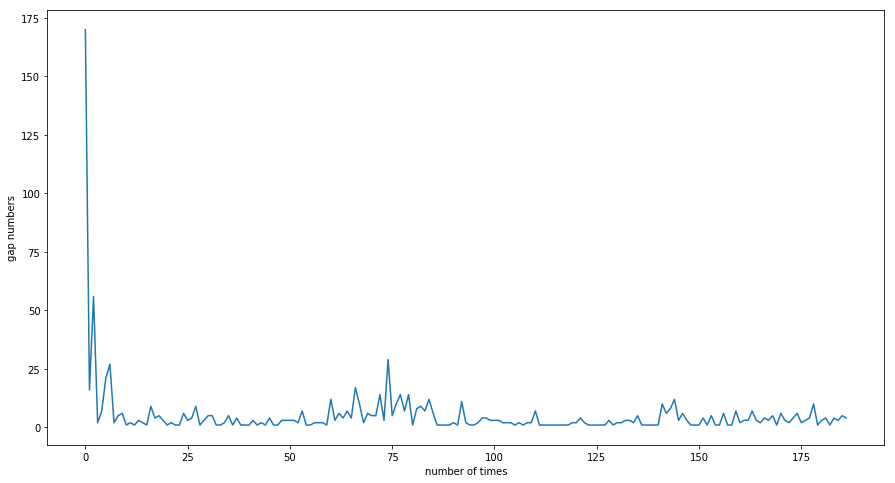

In [32]:
#绘制每次预订相隔天数的折线图
plt.figure(figsize=(15, 8))
plt.plot(gap.keys(),gap.values())
plt.xlabel('number of times')  
plt.ylabel('gap numbers') 

In [ ]:
餐食预订情况分析

Text(0.5,1,'comparison of meal')

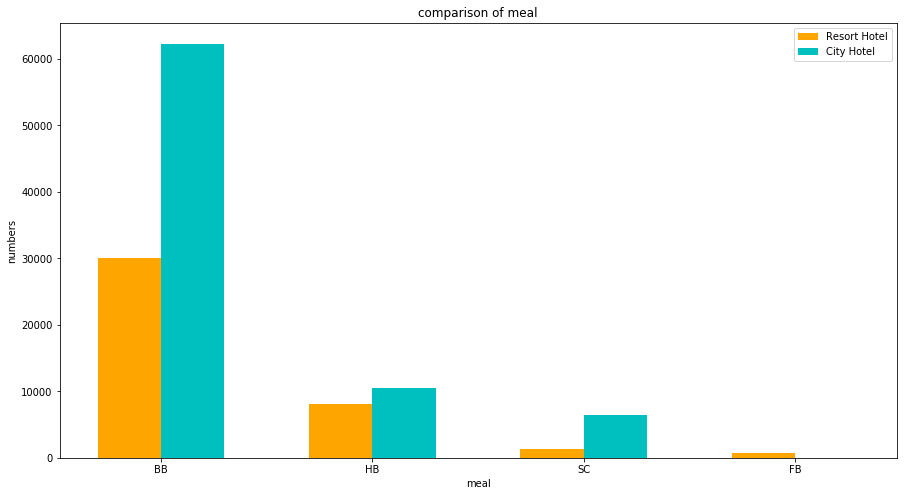

In [33]:
#订餐类型比较
bar_width = 0.3 # 条形宽度
index_rh = np.arange(len(data_rh.meal.value_counts().index))  
index_ch = index_rh + bar_width  
plt.figure(figsize=(15, 8))
plt.bar(index_rh,data_rh.meal.value_counts(),width=bar_width,color='orange', label='Resort Hotel')
plt.bar(index_ch,data_ch.meal.value_counts(),width=bar_width,color='c', label='City Hotel')
plt.legend()  
plt.xticks(index_rh + bar_width/2, data_rh.meal.value_counts().index)  # 让横坐标轴刻度显示data_rh.meal.value_counts().index， index_rh + bar_width/2 为横坐标轴刻度的位置
plt.xlabel('meal')  
plt.ylabel('numbers') 
plt.title('comparison of meal')  

上图说明在城市酒店居住的客户比在假日酒店居住的客户的订餐需求更高；且绝大部分客户选择只预订早餐（即BB）

# 3.一年中最佳预订酒店时间分析

In [34]:
data_bestBooking=pd.DataFrame(data_origin[['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_day_of_month']])

In [35]:
#首先看假日酒店和城市酒店的最佳预订月份
data_bestBooking_rh=data_bestBooking[(data_bestBooking.hotel=='Resort Hotel')&(data_bestBooking.is_canceled==0)]
data_bestBooking_ch=data_bestBooking[(data_bestBooking.hotel=='City Hotel')&(data_bestBooking.is_canceled==0)]

Text(0.5,1,'City Hotel')

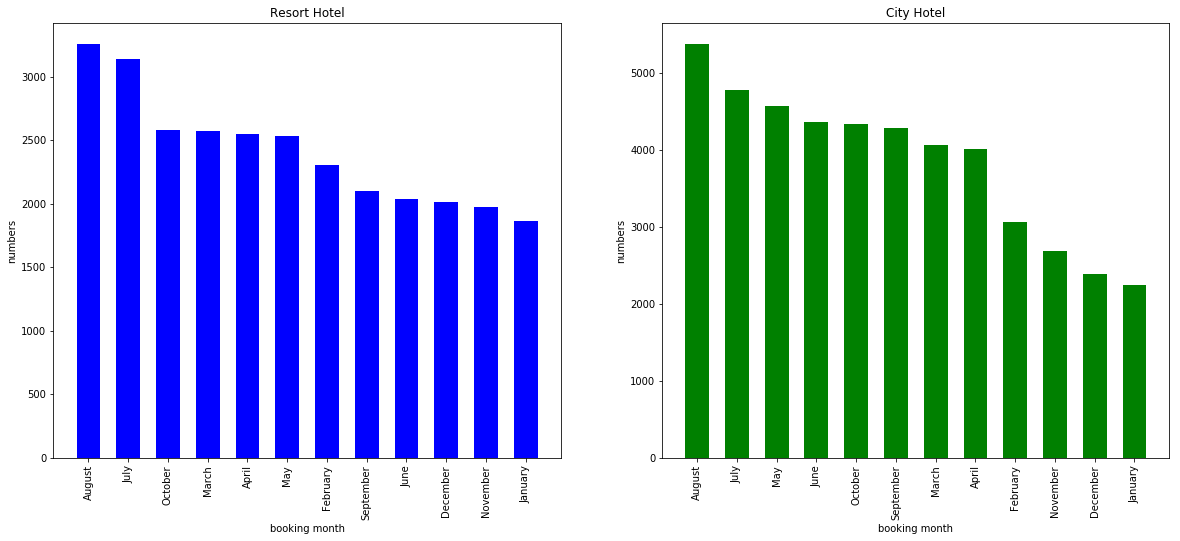

In [65]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.bar(data_bestBooking_rh.arrival_date_month.value_counts().index,data_bestBooking_rh.arrival_date_month.value_counts(),width=0.6,color='b', label='Resort Hotel')
plt.xlabel('booking month')
plt.xticks(rotation=90)
plt.ylabel('numbers') 
plt.title('Resort Hotel')  
plt.subplot(1,2,2)
plt.bar(data_bestBooking_ch.arrival_date_month.value_counts().index,data_bestBooking_ch.arrival_date_month.value_counts(),width=0.6,color='g', label='City Hotel')
plt.xticks(rotation=90)
plt.xlabel('booking month')
plt.ylabel('numbers') 
plt.title('City Hotel')  

上图表明无论是假日酒店还是城市酒店的最佳预订月份均为8月（August）,下面看最佳预订日期

In [37]:
data_bestBooking_rh_day=data_bestBooking[(data_bestBooking.hotel=='Resort Hotel')&(data_bestBooking.is_canceled==0)&(data_bestBooking.arrival_date_month=='August')]
data_bestBooking_ch_day=data_bestBooking[(data_bestBooking.hotel=='City Hotel')&(data_bestBooking.is_canceled==0)&(data_bestBooking.arrival_date_month=='August')]

Text(0.5,1,'City Hotel')

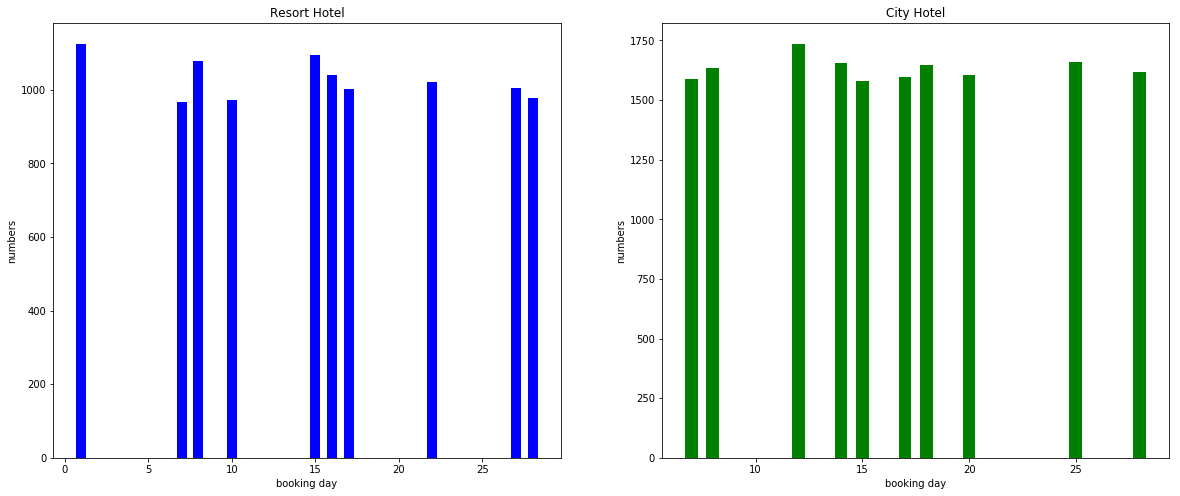

In [38]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.bar(data_bestBooking_rh_day.arrival_date_day_of_month.value_counts()[0:10].index,data_bestBooking_rh.arrival_date_day_of_month.value_counts()[0:10],width=0.6,color='b', label='Resort Hotel')
plt.xlabel('booking day')
plt.ylabel('numbers') 
plt.title('Resort Hotel')  
plt.subplot(1,2,2)
plt.bar(data_bestBooking_ch_day.arrival_date_day_of_month.value_counts()[0:10].index,data_bestBooking_ch.arrival_date_day_of_month.value_counts()[0:10],width=0.6,color='g', label='City Hotel')
plt.xlabel('booking day')
plt.ylabel('numbers') 
plt.title('City Hotel')  

上图表明假日酒店的一年中最佳预订时间为8月1日；城市酒店一年中最佳预订时间为8月12日

# 4.利用LogisticRegression预测酒店预订状态 

### 利用数据信息预测酒店预订的最后状态   0-客户已入住并退房  1--预定取消 2--客人未办理入住手续

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
data_LR=pd.DataFrame(data_origin[['hotel','is_canceled','lead_time','adults','children','babies','meal','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','reservation_status']])

In [41]:
data_LR.replace('Undefined','SC',inplace=True) #将meal一列值为Undefined全部替换为SC

In [42]:
class_mapping1 = {'Resort Hotel': 0,'City Hotel':1}
class_mapping2 = {'Check-Out':0,'Canceled':1,'No-Show':2}
data_LR.hotel=data_LR.hotel.map(class_mapping1)
data_LR.reservation_status=data_LR.reservation_status.map(class_mapping2)

In [43]:
meal_onehot=pd.get_dummies(data_LR.meal) 

In [44]:
data_bookdate.head(3)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,2015,7,1,2015,7,1
1,2015,7,1,2015,7,1
2,2015,7,1,2015,7,2


In [45]:
data_LR=pd.concat([data_LR,meal_onehot,data_bookdate],axis = 1)

In [46]:
data_LR.drop(['meal'], axis=1,inplace=True)

In [47]:
data_LR.adr=data_LR.adr.astype('int')

In [48]:
data_LR.dropna(inplace=True)

In [49]:
data_LR.head(5)

,hotel,is_canceled,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,reservation_status,BB,FB,HB,SC,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,0,0,342,2,0.0,0,0,0,3,0,0,1,0,0,0,2015,7,1,2015,7,1
1,0,0,737,2,0.0,0,0,0,4,0,0,1,0,0,0,2015,7,1,2015,7,1
2,0,0,7,1,0.0,0,0,0,0,75,0,1,0,0,0,2015,7,1,2015,7,2
3,0,0,13,1,0.0,0,0,0,0,75,0,1,0,0,0,2015,7,1,2015,7,2
4,0,0,14,2,0.0,0,0,0,0,98,0,1,0,0,0,2015,7,1,2015,7,3


In [50]:
y = data_LR['reservation_status']  #用reservation_status一列的值做标签
x = data_LR.drop('reservation_status',axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [51]:
logreg=LogisticRegression().fit(X_train,y_train)

In [52]:
print("Training set score:{:.4f}".format(logreg.score(X_train,y_train)))

Training set score:0.9895


In [53]:
print("Test set score:{:.4f}".format(logreg.score(X_test,y_test)))

Test set score:0.9906


绘制在C=1时，Logistic回归在该数据集上学到的系数

Text(0,0.5,'para values')

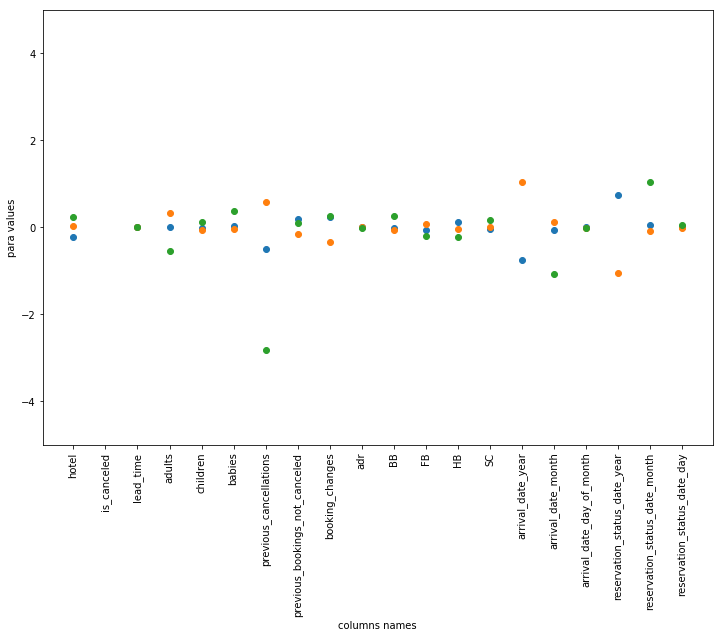

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(logreg.coef_.T,'o')
plt.xticks(range(x.shape[1]),x.columns,rotation=90)
plt.ylim(-5,5)
plt.xlabel('columns names')
plt.ylabel('para values')